In [1]:
import datetime
import time
import sys
sys.path.append(r'/home/hengtian/lucy/factor-analyzer-v4/')
import pymysql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import multiprocessing
import os
import queue

import datetime as dt


In [ ]:
apm_ov = pd.read_csv("/home/hengtian/kate/apm/data_inday/ovngt_1030_1430.csv",index_col =0)

In [97]:
ov_apm = pd.read_csv("/home/hengtian/kate/apm/apm_ovpm.csv", index_col = 0)

In [122]:
ov_apm=ov_apm[apm_ov.columns]

In [102]:
apm_ov= apm_ov[:-2]

In [26]:
a =apm_ov.loc['2021-06-22']
idx_a = a[a.isnull()].index
b = ov_chg.loc['2021-06-22']
idx_b = b[b.isnull()].index
total =list(idx_a.union(idx_b))
a[total]= np.nan
b[total]=np.nan

In [129]:
def fac_corr(date,q):
    inday = apm_ov.loc[date]
    ovngt =ov_apm.loc[date]
    idx_a = inday[inday.isnull()].index
    idx_b = ovngt[ovngt.isnull()].index
    total = list(idx_a.union(idx_b))
    inday[total]= np.nan
    ovngt[total]=np.nan
    corr = np.corrcoef(inday.dropna(),ovngt.dropna())[0,1]
    return q.put({date:corr})

In [130]:
q = multiprocessing.Manager().Queue()
param = []
dates = apm_ov['2018-01-31':].index
for date in dates:
    param.append((date,q))
# print(param)
#task
with multiprocessing.Pool(processes =4) as pool:
    pool.starmap(fac_corr,param)

#extract
elements = []
while q.qsize():
    elements.append(q.get())

In [93]:
# list(elements[0].keys())[0]
a = list(elements[0].keys())[0]
val = elements[0].get(a)
val

-0.005288857074543341

In [131]:
d = pd.DataFrame(np.empty((len(dates),1),dtype=object),index=dates)
for i in range(len(elements)):
    date = list(elements[i].keys())[0]
    val = elements[i].get(date)
    d.loc[date]=val

<AxesSubplot:>

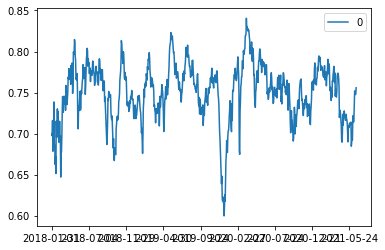

In [132]:
d.plot()

In [133]:
d.to_csv("ov_apm_trash_correlation.csv")

In [111]:
d.loc['2021-06-09']

0    0.077788
Name: 2021-06-09, dtype: object

In [112]:
apm_ov.loc['2021-06-09']

000001.XSHE   -1.754446
000002.XSHE   -0.642658
000004.XSHE         NaN
000005.XSHE         NaN
000006.XSHE   -0.125725
                 ...   
688777.XSHG         NaN
688788.XSHG         NaN
688819.XSHG   -0.527994
688981.XSHG    0.598987
689009.XSHG   -1.019853
Name: 2021-06-09, Length: 4414, dtype: float64

In [113]:
ov_apm.loc['2021-06-09']

000001.XSHE   -2.622683
000002.XSHE   -1.028090
000004.XSHE   -0.151198
000005.XSHE         NaN
000006.XSHE   -0.614030
                 ...   
688276.XSHG         NaN
301019.XSHE         NaN
688367.XSHG         NaN
688601.XSHG         NaN
301013.XSHE         NaN
Name: 2021-06-09, Length: 4414, dtype: float64

In [115]:
pd.concat([apm_ov.loc['2021-06-09'], ov_apm.loc['2021-06-09']], axis=1).corr()

,2021-06-09,2021-06-09
2021-06-09,1.000000,0.719331
2021-06-09,0.719331,1.000000


In [118]:
fac_corr('2021-06-09')

0.07778833864681374